# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to : 
* perform data munging

## Dataset



### Description

* The dataset is made up of 1016810 rows and 7 columns. 

* Each line is the data of one student

* The seven columns correspond to 
   - Region Code
   - student id
   - English marks
   - First Language marks
   - Math marks
   - Science marks
   - Social marks
* The marks for the students absent  for the exam are sometimes denoted by 'A', sometimes denoted by ' AA', sometimes denoted by 'AAA' and sometimes denoted by 'G'. Sometimes there is a space before or after these strings.

* If the student is not marked as absent but no marks in a subject then he is a supplementary candidate.

## Definitions

* A student who has passed in all subjects and has scored more than 60% in aggregate is awarded a First Class

* A student who has passed in all subjects and has scored more than 50% in aggregate is awarded a Second Class

* A student who has passed in all subjects and has scored more than 40% in aggregate is awarded a Third Class





### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M0W1_Data_munging" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/SSLC_data.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
Dataset = "SSLC_data.txt"

#### Exercise 0 :

Load the data using pandas

In [0]:
#### Your Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def strip(text):
    try:
        if(text.isdigit()):
          return int(text.strip())
        else:
          return text.strip()
    except AttributeError:
        return text

df = pd.read_csv(
                 Dataset, 
                 header=None, 
                 sep=";", 
                 names =  ["regionCode", "studentId", "engMarks", "fLangMarks", "mathMarks", "sciMarks","socialMarks"],
                 converters = {
                                'engMarks' : strip,
                                'fLangMarks' : strip,
                                'mathMarks' : strip,
                                'sciMarks' : strip,
                                'socialMarks' : strip

                              }
                 )
print(df[:10], "\n\nshape - ", df.shape, "\n\ndtypes:\n", df.dtypes)


   regionCode  studentId engMarks fLangMarks mathMarks sciMarks socialMarks
0           1      10001       53         36        28       16          44
1           1      10002       58         37        42       35          40
2           1      10003       72         56        71       55          70
3           1      10004       87         64        83       58          65
4           1      10005       59         45        50       35          48
5           1      10006       44         37        25       18          37
6           1      10007       62         46        49       36          44
7           1      10008       87         71        97       71          81
8           1      10009       43         40        45       35          35
9           1      10010       49         42        20       27          40 

shape -  (1016810, 7) 

dtypes:
 regionCode      int64
studentId       int64
engMarks       object
fLangMarks     object
mathMarks      object
sciMarks       obje

#### Exercise 1 :

Drop all the supplementary candidates from the dataset

In [0]:
#### Your Code Here
df.replace('', np.nan, inplace=True)
df = df.dropna()
print(df.shape)
    



(936984, 7)


#### Exercise 2 :

Standardize the indication  for the absent students. 

For example replace all absentees notation with  'ABS'

In [0]:
#### Your Code Here
df = df.replace(['A','AA','AAA','G'], 'ABS')

#### Exercise 3 :

Draw a bar plot. Representing subject verus average marks in each subject.

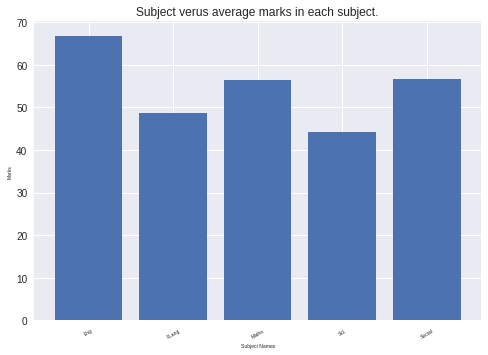

In [0]:
#### Your Code Here

df = df[(df != 'ABS').all(1)]
subjectsCol = ["engMarks", "fLangMarks", "mathMarks", "sciMarks","socialMarks"]
for each in subjectsCol:
  df[each] = pd.to_numeric(df[each])


subjects = ["Eng", "FLang", "Maths", "Sci.","Social"]
index = np.arange(len(subjects))
plt.bar(index, df[["engMarks", "fLangMarks", "mathMarks", "sciMarks","socialMarks"]].mean())
plt.xlabel('Subject Names', fontsize=5)
plt.ylabel('Marks', fontsize=5)
plt.xticks(index, subjects, fontsize=5, rotation=30)
plt.title('Subject verus average marks in each subject.')
plt.show()

#### Exercise 4 :

Draw a stacked bar plot. Representing subject verus number of students with first class, number of students with second class and number of students with third class. 

To know how to Draw a stacked bar plot refer to the below link:

https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html



### Please answer the questions below to complete the experiment:


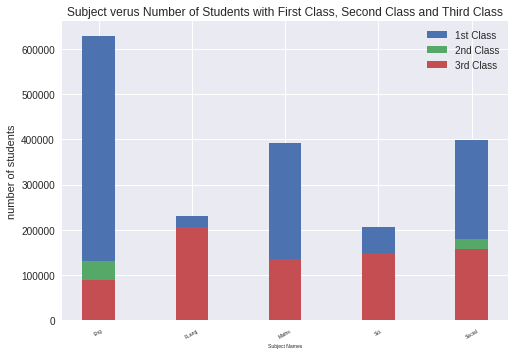

In [0]:
#### Your Code Here
subjects = ["Eng", "FLang", "Maths", "Sci.","Social"]
subjectsCol = ["engMarks", "fLangMarks", "mathMarks", "sciMarks","socialMarks"]

Class1 = [df[df[each] > 60].shape[0] for each in subjectsCol]
Class2 = [df[(df[each] > 50) & (df[each] <= 60)].shape[0] for each in subjectsCol]
Class3 = [df[(df[each] > 40) & (df[each] <= 50)].shape[0] for each in subjectsCol]

index = np.arange(len(subjects))
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(index, Class1, width)
p2 = plt.bar(index, Class2, width)
p3 = plt.bar(index, Class3, width)

plt.xlabel('Subject Names', fontsize=5)
plt.ylabel('number of students')
plt.title('Subject verus Number of Students with First Class, Second Class and Third Class')
plt.xticks(index, subjects, fontsize=5, rotation=30)
plt.legend((p1[0], p2[0], p3[0]), ('1st Class', '2nd Class', '3rd Class'))
plt.show()

In [0]:
subjectsCol = ["engMarks", "fLangMarks", "mathMarks", "sciMarks","socialMarks"]
len1 = df[(df["engMarks"] >=60) & (df["fLangMarks"] >=60) & (df["mathMarks"] >=60) & (df["sciMarks"] >=60) & (df["socialMarks"] >=60) ].shape[0]
# len2 = len([ each for each in df[subjectsCol].mean(axis=1)   if each >=60])

tmp_df = df
tmp_df = tmp_df[(df >=40).all(1)]
len2 = len([ each for each in tmp_df[subjectsCol].mean(axis=1)   if each >=60])
print(len1)
print(len2)
print("len2 - len1 = ", len2 - len1)


149287
167225
len2 - len1 =  17938


In [0]:
#@title As per the old rules, one must 60 percent or more in *all* the subjects to get a first class. Currently it is enough if you pass in all the subjects and score 60 percent or more on average. How many more people  will get a first class under the new rules compared to the old rules (Pass marks = 40)? { run: "auto", display-mode: "form" }
Answer = "17938" #@param {type:"string"}

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "all was good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1605
Date of submission:  15 Mar 2019
Time of submission:  00:26:56
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
